# Fermat's Factorization Scheme

## Theory : 
For an odd integer $n$, solving $n=x^2−y^2$ leads to $n= (x−y)(x+y)$ factorization. Conversely, for any odd $n=ab$ , $a≥b≥1$ we can get $n= \big(\frac{a+b}{2}\big)^2− \big(\frac{a-b}{2}\big)^2$.



## 1. Non-Generalized


Start from an integer $k$ such that $k^2 \geq n$. Then look successively at: $$k^2-n ,\ (k+1)^2-n, ......,\ (k+j)^2-n \ ;\ j=0,1,2,....$$ Until we find a square. This process is finite because eventually we will arrive at trivial factorization $n=n.1$ when $k+j=\frac{n+1}{2}$. 

It returns large factors not necessarily prime. Direct mathod of factoring by number less than $\sqrt n$ works better for integers with small factors as in case of large integers $\sqrt n$ is large, increasing the number of computations to find factors near $\sqrt n$.

In [9]:
import math as m
def fermat1(n):
    factors = []
    if n%2 == 0:
        while n%2 == 0:
            n = n/2
        factors.append(2)
    n_root = m.sqrt(n)
    k = m.ceil(n_root)  
    if k == n_root:
        factors.append([n_root,n_root])
    else:
        y2 = int(k*k-n)
        y = m.isqrt(y2)
        while y*y!=y2:
            k=k+1
            y2=int(k*k-n)
            y=m.isqrt(y2)
        factors.append([k+y,k-y])
    return factors 

In [10]:
fermat1(2)

[2, [1.0, 1.0]]

In [11]:
fermat1(124124)

[2, [217, 143]]

In [12]:
import time
strt = time.perf_counter()
print(fermat1(1234567895341))
end = time.perf_counter()
print(f'Time taken = {end-strt}')

[[9924259, 124399]]
Time taken = 1.8064758000000438


In [13]:
strt = time.perf_counter()
print(fermat1(49))
end = time.perf_counter()
print(f'Time taken = {end-strt}')

[[7.0, 7.0]]
Time taken = 0.00031730000000607106


In [14]:
strt = time.perf_counter()
print(fermat1(1689243484681))
end = time.perf_counter()
print(f'Time taken = {end-strt}')

[[1299709.0, 1299709.0]]
Time taken = 0.00033949999988180934


# Running Time Analysis

##### For prime inputs only

In [15]:
import matplotlib.pyplot as plt
import sympy as sp
import math
import random
def analysis2(B,k):
    x = []
    y = []
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        st = (end-start)/k
        for i in range(1,k+1):
            L = random.randint(start,start+st)
            while sp.isprime(L) != True:
                L = random.randint(start,start+st)   
            start = start+ st
            x.append(L)
            s = time.perf_counter()
            f1= fermat1(L)
            e = time.perf_counter()
            y.append(e-s)
    plt.figure(figsize=(20,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y, color = 'b')
    plt.xlabel('values')
    plt.ylabel('Time of Execution(seconds)')
    plt.show()

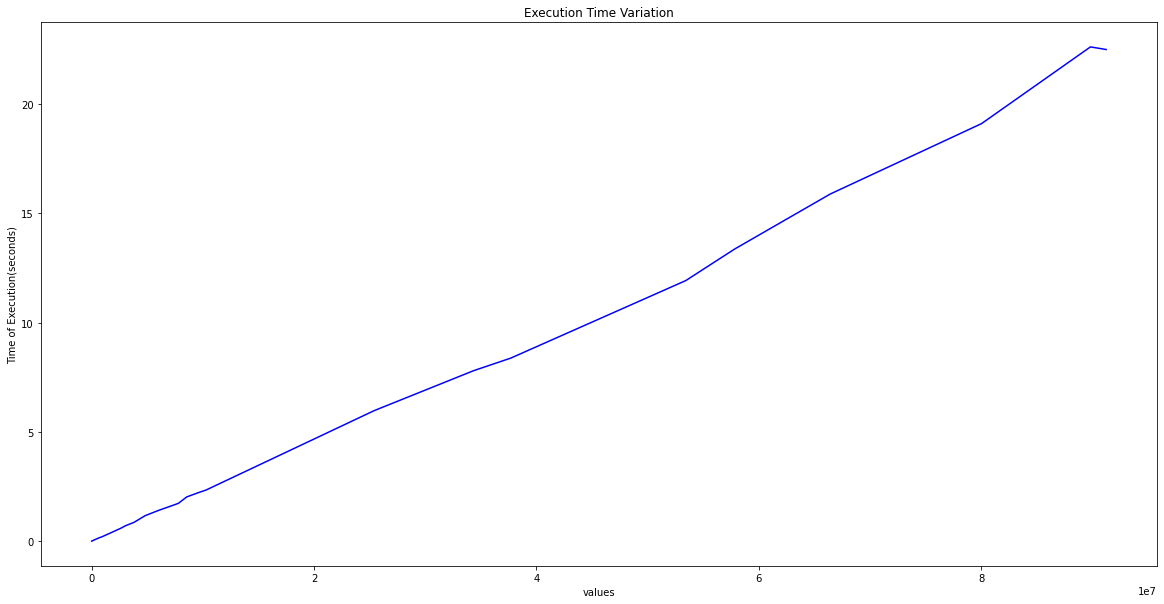

In [16]:
analysis2(8,10)

##### Peaks in previous plot are for prime numbers mainly which suppreses the result of others. So, we now plot only for odd non-prime integers.

In [17]:
def analysis3(B,k):
    x = []
    y = []
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        st = (end-start)/k
        for i in range(1,k+1):
            L = random.randint(start,start+st)
    
            while L%2 == 0:
                L = random.randint(start,start+st)
                while sp.isprime(L) == True:
                    L = random.randint(start,start+st)
            while sp.isprime(L) == True:
                L = random.randint(start,start+st)
            
            start = start+ st
            x.append(L)
            s = time.perf_counter()
            f1= fermat1(L)
            e = time.perf_counter()
            y.append(e-s)

    plt.figure(figsize=(20,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y, color = 'b')
    plt.xlabel('values')
    plt.ylabel('Time of Execution(seconds)')
    plt.show()

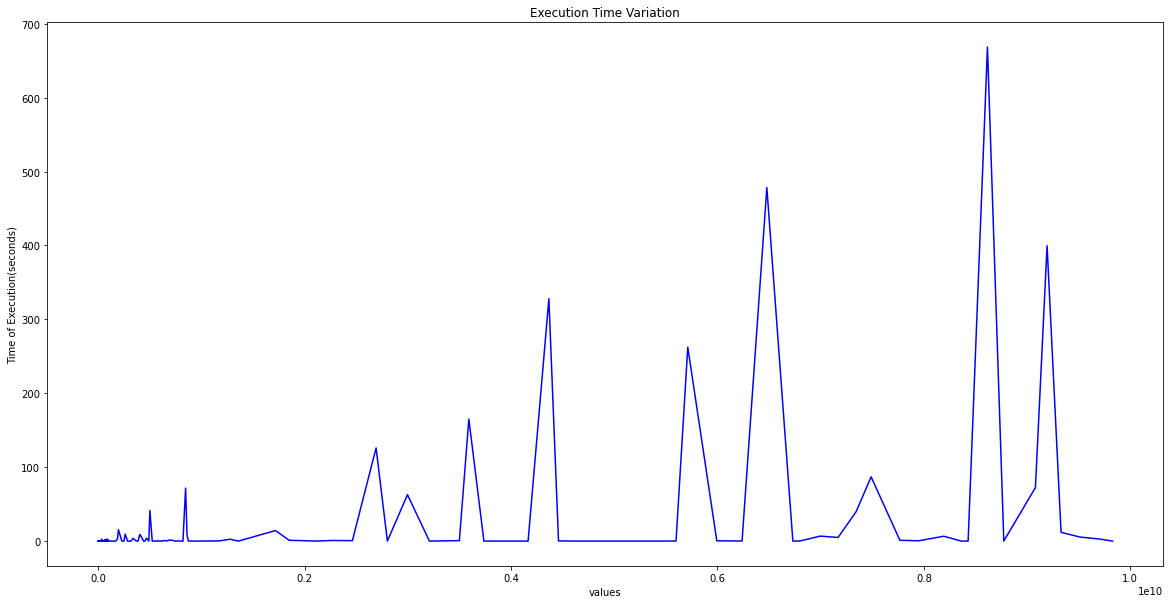

In [18]:
analysis3(10,50)

##### Running time for odd non-prime $d$-digit number. Time for particular $d$ digit is average time of $k$ $d$-digit numbers chosen from $k$ disjoint equal length intervals.

In [19]:
def analysis3(B,k):
    x = []
    y = []
    for n in range(2,B):
      
        start = 10**(n)
        end = 10**(n+1)
        st = (end-start)/k
        time_list = []
        for i in range(1,k):
            L = random.randint(start,start+st)
            while L%2 == 0:
                L = random.randint(start,start+st)
                while sp.isprime(L) == True:
                    L = random.randint(start,start+st)
            while sp.isprime(L) == True:
                L = random.randint(start,start+st)
            start = start+ st
            s = time.perf_counter()
            fermat1(L)
            e = time.perf_counter()
            time_list.append(e-s)
        tim = sum(time_list)/len(time_list)
        x.append(n+1)
        y.append(tim)
    
    plt.figure(figsize=(20,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y, color = 'b')
    plt.xlabel('No of digits')
    plt.ylabel('Time of Execution(seconds)')
    plt.show()

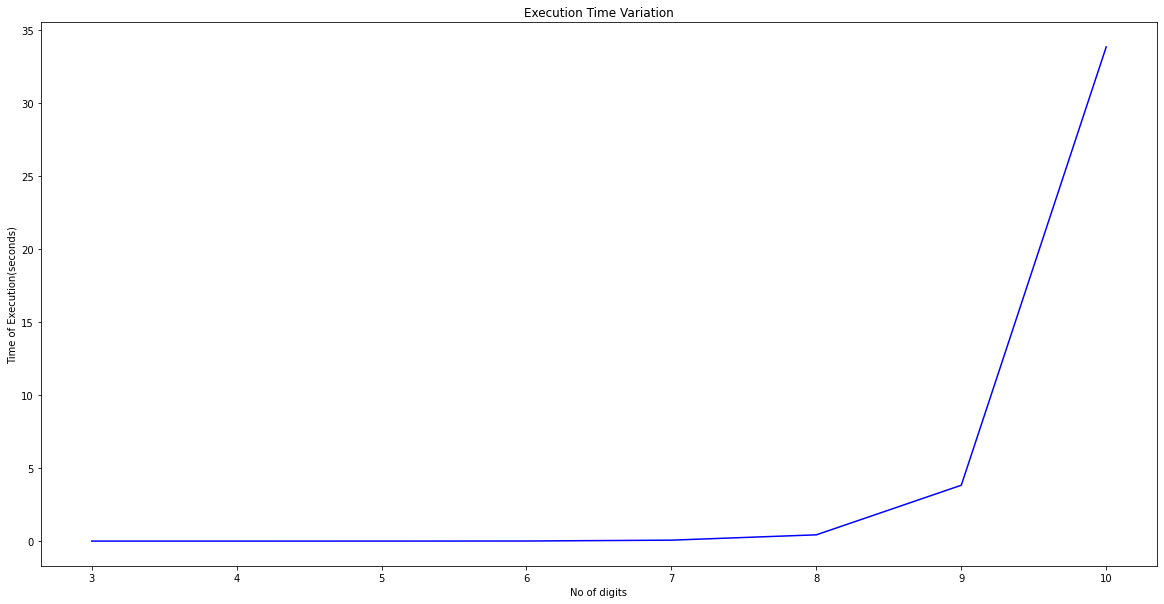

In [20]:
analysis3(10,50)

### Factoring by Numbers Less than $\sqrt n$

In [21]:
def trial(n):
    x= math.floor(m.sqrt(n))
    for i in range(2,x+1):
        if n%i==0:
            print("Factors=",i,n/i)
            break

In [22]:
strt = time.perf_counter()
trial(1234567895341)
end = time.perf_counter()
print(f'Time taken = {end-strt}')

Factors= 11 112233445031.0
Time taken = 0.0002060999995592283


In [23]:
strt = time.perf_counter()
trial(1689243484681)
end = time.perf_counter()
print(f'Time taken = {end-strt}')

Factors= 1299709 1299709.0
Time taken = 0.18109460000050603


## 2. Generalized

Instead of solving for $x^2 - y^2=n$,  we solve for $x^2 - y^2 = k.n\ $   for some integer $k$. Which means: $$x^2\equiv y^2 \ mod(n) \implies x^2-y^2\equiv 0 \ mod(n) \ i.e. \ (x-y)(x+y)\equiv 0 \ mod(n)$$
We get trivial factorization in case of $x\not \equiv \mp y \ mod(n)$. And, $gcd(x-y,n)$ and $gcd(x+y,n)$ will be our non-trivial divisors of $n$.

However in practical this method can take more time than  method 1 but theoretically it is better  as now we need to check for $x^2-k.n$ for perfect square for any value of $k$ whereas earlier $x^2-n$ had to be square so we would need to recalculate $x^2$ every time. 

In [25]:
def fermat2(n): 
    factors = []
    if n%2 == 0:
        while n%2 == 0:
            n = n/2
        factors.append(2)
    n = int(n)
    root_n = m.sqrt(n)
    x = m.ceil(root_n)
    if x == root_n:
        factors.append([x,x])
    else:
        x2 = x*x
        y2 = x2-n
        root_y2 = m.sqrt(y2)
        y = m.ceil(root_y2)
        k=2
        while y*y!=y2:
            if x2>k*n:
                y2 = x2-k*n
                root_y2 = m.sqrt(y2)
                y = m.ceil(root_y2)
                k=k+1
            else:
                x= x+1
                x2 = x*x
                y2 = x2-n
                root_y2 = m.sqrt(y2)
                y = m.ceil(root_y2)
        factors.append([m.gcd(int(x-y),n),m.gcd(int(x+y),n)])
    return factors

## Running Time Analysis

##### Prime inputs only

In [26]:
def analysis2(B,k):
    x = []
    y = []
    y1=[]
    for n in range(2,B):
        
        start = 10**(n)
        end = 10**(n+1)
        st = (end-start)/k
        
        for i in range(1,k+1):
            L = random.randint(start,start+st)
            while sp.isprime(L) != True:
                L = random.randint(start,start+st) 
            start = start+st
            x.append(L)
            s = time.perf_counter()
            fermat2(L)
            e = time.perf_counter()
            y.append(e-s)
            
            s = time.perf_counter()
            fermat1(L)
            e = time.perf_counter()
            y1.append(e-s)
    
    plt.figure(figsize=(20,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y, color = 'r')
    plt.plot(x,y1,color='b')
    plt.xlabel('values')
    plt.ylabel('Time of Execution(seconds)')
    plt.legend(['Generalised FFS','Non-generalised FFS'])
    plt.show()

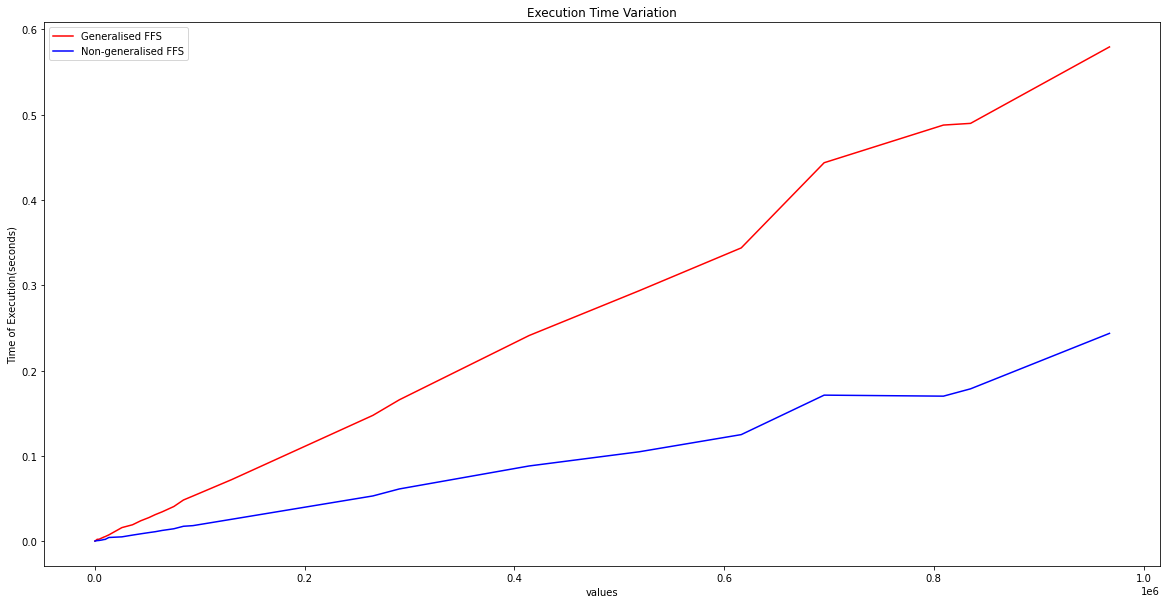

In [27]:
analysis2(6,10)

#### Odd non-prime Inputs

In [28]:
def analysis3(B,k):
    x = []
    y1 = []
    y2=[]
    for n in range(2,B):
        
        start = 10**(n)
        end = 10**(n+1)
        st = (end-start)/k
        time_list2 = []
        time_list1=[]
        for i in range(1,k):
            
            L = random.randint(start,int(start+st))
            while L%2 == 0:
                L = random.randint(start,int(start+st))
                while sp.isprime(L) == True:
                    L = random.randint(start,int(start+st))
            while sp.isprime(L) == True:
                L = random.randint(start,int(start+st))    
            start = start+ st
            s = time.perf_counter()
            fermat2(L)
            e = time.perf_counter()
            time_list2.append(e-s)
            s = time.perf_counter()
            fermat1(L)
            e = time.perf_counter()
            time_list1.append(e-s)
            
        tim1 = sum(time_list1)/len(time_list1)
        tim2 = sum(time_list2)/len(time_list2)
        x.append(n+1)
        y1.append(tim1)
        y2.append(tim2)
        
    plt.figure(figsize=(20,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y1, color = 'b')
    plt.plot(x,y2, color = 'r')
    plt.xlabel('No of digits')
    plt.ylabel('Time of Execution(seconds)')
    plt.legend(['Non-generalised FFS','Generalised FFS'])
    plt.show()

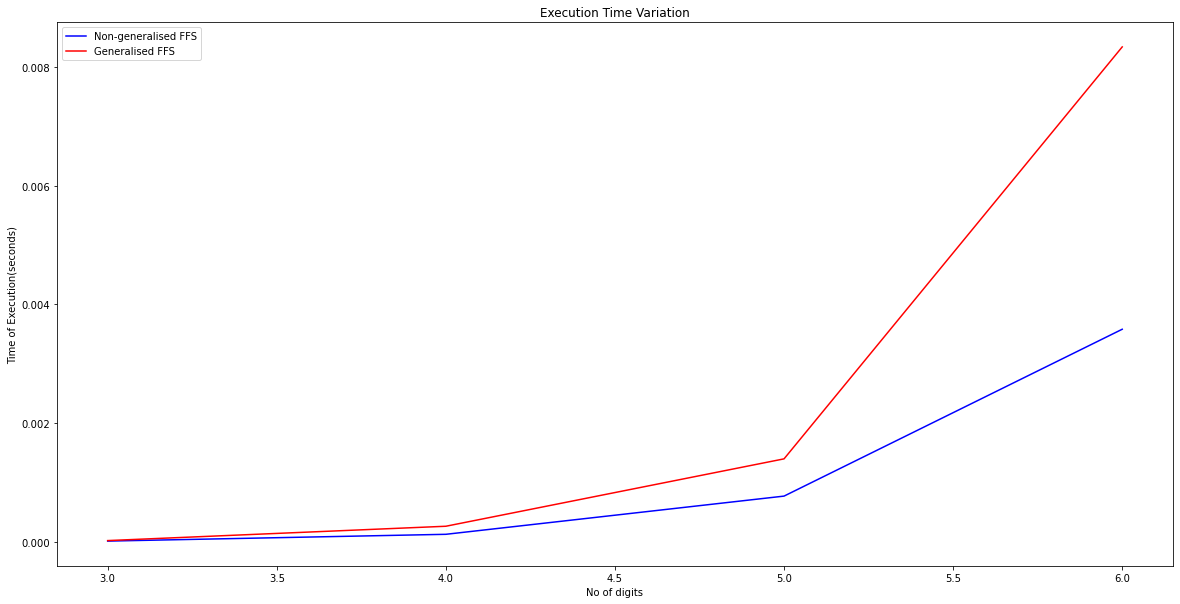

In [29]:
analysis3(6,10)